In [79]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt 


In [80]:
df = pd.read_csv('income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

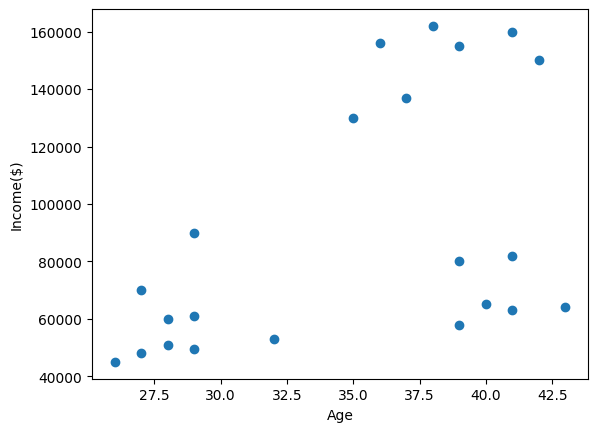

In [81]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

```MODEL TRAINING```
- number of clusters 
-  model train 
- and visualise

- Standard scaler for generalising the data. to convert the values in same unit 

In [82]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [83]:
y_predicted 

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [84]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


C:\Users\HP\AppData\Local\Temp\ipykernel_18096\3645268817.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


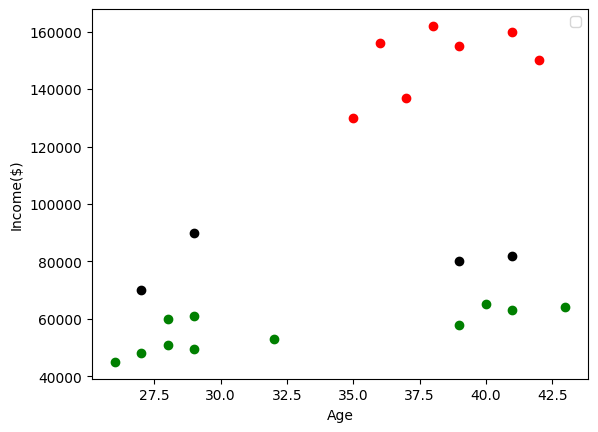

In [85]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age , df1['Income($)'], color='green')
plt.scatter(df2.Age , df2['Income($)'], color='red')
plt.scatter(df3.Age , df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

``` After standard scaling```

In [86]:
scaler = StandardScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


In [87]:
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,2
1,Michael,-1.009157,-0.010159,2
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,1


In [88]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [89]:
y_predicted 

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [90]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,1
1,Michael,-1.009157,-0.010159,1
2,Mohan,-1.009157,-0.692421,1
3,Ismail,-1.182606,-0.715947,1
4,Kory,1.245679,1.401417,0


In [91]:
km.cluster_centers_

array([[ 0.60143983,  1.40141653],
       [-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261]])

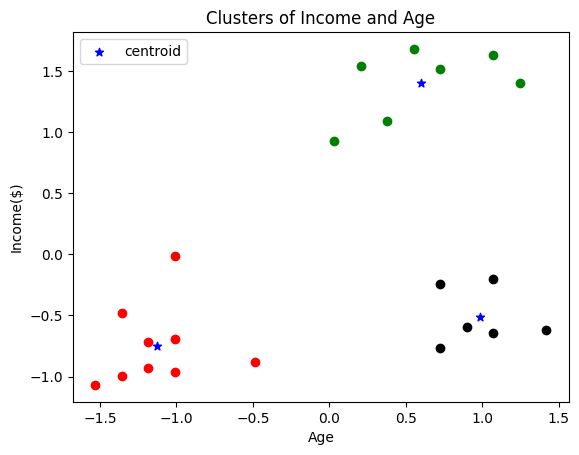

In [92]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age , df1['Income($)'], color='green')
plt.scatter(df2.Age , df2['Income($)'], color='red')
plt.scatter(df3.Age , df3['Income($)'], color='black')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='blue', marker='*', label='centroid')
plt.title('Clusters of Income and Age')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

``` ELBOW METHOD```
- In KMeans Elbow method is used 
- In which x axis is given with points and after plotting a line chart..It plots in the shape of the elbow 
- The edge point(elbow) is seen to check the number of k (clusters )

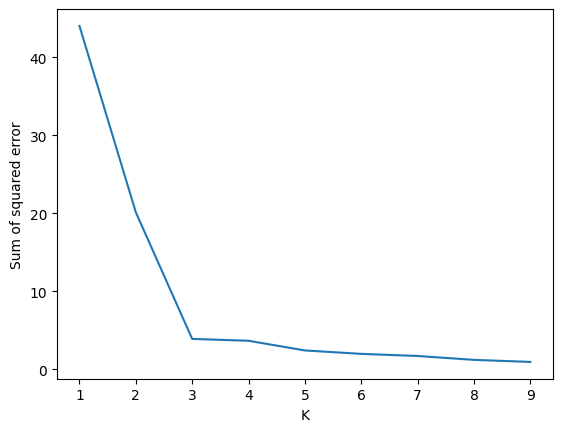

In [93]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

```centroid method```
- one datapoint is taken from the set and the distance is calculated by eucledian formula 
- the closest datapoint is assigned to the centroid 
- then mean is calculated and the centroid changes 
- this is used in hierarchial clustering 
